In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 난수 고정

In [4]:
np.random.seed(0)

### tranin, test data 생성 및 확인
* DataSet : 28x28 pixel의 0~9까지의 숫자를 255까지의 숫자로 표현한 train, test 데이터

In [34]:
(X_train, Y_train),(X_test, Y_test) = keras.datasets.mnist.load_data()

In [50]:
# X_train[0] 모양 확인
for x in X_train[0]:
    for i in x:
        print('{:3} '.format(i), end='')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

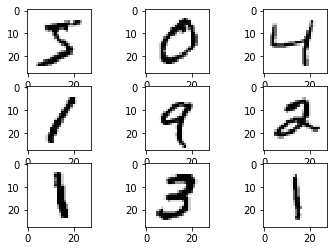

In [49]:
# X_train[:9] img로 확인
for i in range (9) :
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()

In [62]:
Y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [67]:
print(f'X_train shape : {X_train.shape}')
print(f'X_train dtype : {X_train.dtype}')
print(f'X_test shape : {X_test.shape}')
print(f'X_test dtype : {X_test.dtype}')

X_train shape : (60000, 28, 28)
X_train dtype : uint8
X_test shape : (10000, 28, 28)
X_test dtype : uint8


In [70]:
print(f'Y_train[;9] : {Y_train[:9]}')
print(f'Y_test[;9]  : {Y_test[:9]}')

Y_train[;9] : [5 0 4 1 9 2 1 3 1]
Y_test[;9]  : [7 2 1 0 4 1 4 9 5]


In [71]:
# X_train, X_test data의 모양을 (n,28,28,1)로 변경 후 값을 0~1사이로 범위를 변경
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float64')/255

In [84]:
# Y_train, Y_test data의 값을 index로 변경
Y_train = keras.utils.to_categorical(Y_train,10)
Y_test = keras.utils.to_categorical(Y_test,10)

### Model Layer

In [77]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5,5),
                strides=(1,1),
                padding='same',
                activation='relu',
                input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,kernel_size=(2,2),
                padding='same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)             

In [79]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
hist = model.fit(X_train,Y_train,
                batch_size=1000, epochs=5,
                verbose=1,
                validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 124s 2ms/step - loss: 0.5139 - accuracy: 0.8348 - val_loss: 0.0804 - val_accuracy: 0.9731
Epoch 2/5
60000/60000 [==============================] - 124s 2ms/step - loss: 0.1106 - accuracy: 0.9681 - val_loss: 0.0457 - val_accuracy: 0.9844
Epoch 3/5
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0755 - accuracy: 0.9778 - val_loss: 0.0337 - val_accuracy: 0.9885
Epoch 4/5
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0578 - accuracy: 0.9839 - val_loss: 0.0313 - val_accuracy: 0.9900
Epoch 5/5
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0503 - accuracy: 0.9851 - val_loss: 0.0259 - val_accuracy: 0.9917


In [88]:
score=model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02586314012411458, 0.9916999936103821]


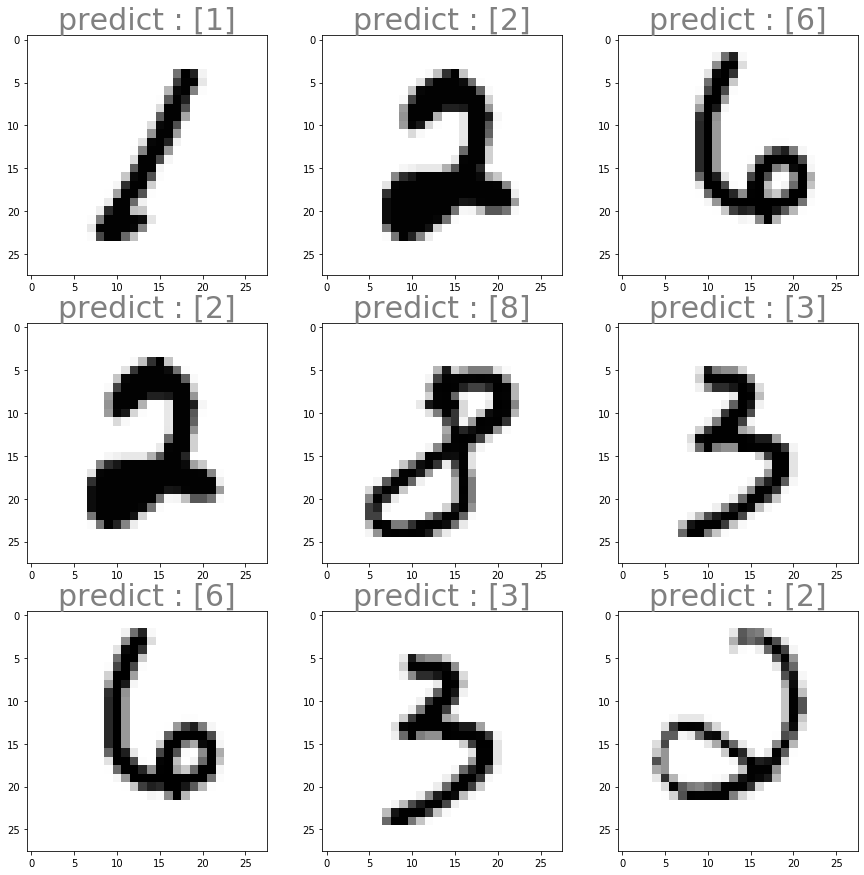

In [113]:
n = np.random.randint(10000,size=9)
fig, axes = plt.subplots(3,3,figsize=(15,15))
for i in range(3):
    for j in range(3):
        axes[i,j].imshow(X_test[n[(i+1)*(j+1)-1]].reshape(28,28),cmap='Greys',interpolation='nearest')
        axes[i,j].set_title(f'predict : {model.predict_classes(X_test[n[(i+1)*(j+1)-1]].reshape((1,28,28,1)))}',fontsize=30,color='grey')
plt.show()